---
Exercises: Named Entity Recognition (NER)
===

aka, PERSON Classification
----

![](http://cdn4.teehunter.com/wp-content/uploads/2015/10/wheres-waldo-via-the-telegraph.jpg)

__Where's Waldo in text?__

In [145]:
reset -fs

In [146]:
import nltk

In [147]:
text = "Lambda, Dr. Brian Spiering works at Chao Galvanize / JW GalvanizeU, John powered by the University of New Haven, in San Francisco, California. at John"

# text = "Brian"
tagged = nltk.pos_tag(nltk.word_tokenize(text))
print(nltk.ne_chunk(tagged,
                    binary=True))

(S
  (NE Lambda/NNP)
  ,/,
  Dr./NNP
  (NE Brian/NNP Spiering/NNP)
  works/VBZ
  at/IN
  (NE Chao/NNP Galvanize/NNP)
  //NNP
  JW/NNP
  GalvanizeU/NNP
  ,/,
  (NE John/NNP)
  powered/VBN
  by/IN
  the/DT
  (NE University/NNP)
  of/IN
  (NE New/NNP Haven/NNP)
  ,/,
  in/IN
  (NE San/NNP Francisco/NNP)
  ,/,
  (NE California/NNP)
  ./.
  at/IN
  (NE John/NNP))


In [148]:
#  Change the function call so the output includes more details than just NE/Named Entity

In [149]:
print(nltk.ne_chunk(tagged,
                    binary=False))

# nltk.ne_chunk?

(S
  (GPE Lambda/NNP)
  ,/,
  Dr./NNP
  (PERSON Brian/NNP Spiering/NNP)
  works/VBZ
  at/IN
  (ORGANIZATION Chao/NNP Galvanize/NNP)
  //NNP
  JW/NNP
  GalvanizeU/NNP
  ,/,
  (PERSON John/NNP)
  powered/VBN
  by/IN
  the/DT
  (ORGANIZATION University/NNP)
  of/IN
  (GPE New/NNP Haven/NNP)
  ,/,
  in/IN
  (GPE San/NNP Francisco/NNP)
  ,/,
  (GPE California/NNP)
  ./.
  at/IN
  (PERSON John/NNP))


It should look something like this:
```
(S
  Dr./NNP
  (PERSON Brian/NNP Spiering/NNP)
  works/VBZ
  at/IN
  (ORGANIZATION Galvanize/NNP)
  //NNP
  GalvanizeU/NNP
  ,/,
  powered/VBN
  by/IN
  the/DT
  (ORGANIZATION University/NNP)
  of/IN
  (GPE New/NNP Haven/NNP)
  ,/,
  in/IN
  (GPE San/NNP Francisco/NNP)
  ,/,
  (GPE California/NNP)
  ./.)
```

In [150]:
# :
# How did the tagger do? 
# Is it surprising that it did so well?
# If it missed a tag, why do you think it did?"""

The tagger did very well.

Not surprising, because this corpus is very proper standard American English, with contextual words like "works at" prior to Galvanize.

If it missed a tag, it was probably out of context.

---
Let's compare that to Standard's NER Tagger
---

[Stanford NER (Named Entity Recognizer)](http://nlp.stanford.edu/software/CRF-NER.shtml) is one of the most popular Named Entity Recognition tools and implemented by Java.

---
Installing Java
-----

You're required to have Java working on your system because Java code is at the heart of the program. However, you do __not__ need to worry about the Java part because we provide the commands to compile and run the program.

Assuming you are on a Mac... Make sure you have `homebrew` package manager installed.

In [151]:
import os

In [152]:
if os.system("java -version") == 32512: # Value for 'command not found'
    os.system("brew doctor")
    os.system("brew update")
    os.system("brew install cask")
    os.system("brew cask install java")

In [153]:
os.system("java -version")

0

You might have run 'brew cask install java' in iTerm because installing Java sometimes requires a password.

Now we are ready to play with Standford NER Tagger

In [154]:
from nltk.tag.stanford import StanfordNERTagger

Check out the [source code](http://www.nltk.org/_modules/nltk/tag/stanford.html)

It requires external dependencies including .jar (Java files) and classifers.

We need to downloead those external dependencies. Let's grab a new-ish verison: `Stanford Named Entity Recognizer version 3.4`

In [155]:
base_path = "./stanford-ner-2014-06-16"

# If .jar file is not local, download it and set it up
if not os.path.isfile(base_path+"/stanford-ner.jar"):
    import urllib
    import shutil
    
    url = "http://nlp.stanford.edu/software/stanford-ner-2014-06-16.zip"
    file_name = url.split("/")[-1]
    
    with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)
    
    os.system("brew tap homebrew/dupes") # Install unzip prerequisites
    os.system("brew install unzip") # Install unzip
    os.system("unzip "+file_name) # Unzip
    
    # Now is time to hack...
    # It turns out nltk hardcodes file names, thus we have to manually update the name
    os.rename(base_path+"/classifiers/english.all.3class.distsim.crf.ser.gz", base_path+"/classifiers/all.3class.distsim.crf.ser.gz")     

We are ready to define our tagger!

In [156]:
st = StanfordNERTagger(base_path+'/classifiers/all.3class.distsim.crf.ser.gz',
                       base_path+'/stanford-ner.jar')

Let's tag some words

In [178]:
tag_tuples = st.tag(nltk.word_tokenize(text))
tag_tuples

[('Lambda', 'O'),
 (',', 'O'),
 ('Dr.', 'O'),
 ('Brian', 'PERSON'),
 ('Spiering', 'PERSON'),
 ('works', 'O'),
 ('at', 'O'),
 ('Chao', 'LOCATION'),
 ('Galvanize', 'LOCATION'),
 ('', 'O'),
 ('JW', 'O'),
 ('GalvanizeU', 'O'),
 (',', 'O'),
 ('John', 'PERSON'),
 ('powered', 'O'),
 ('by', 'O'),
 ('the', 'O'),
 ('University', 'ORGANIZATION'),
 ('of', 'ORGANIZATION'),
 ('New', 'ORGANIZATION'),
 ('Haven', 'ORGANIZATION'),
 (',', 'O'),
 ('in', 'O'),
 ('San', 'LOCATION'),
 ('Francisco', 'LOCATION'),
 (',', 'O'),
 ('California', 'LOCATION'),
 ('.', 'O'),
 ('at', 'O'),
 ('John', 'PERSON')]

What does the 'O' mean?

O means refer to other category, Named Entity, which referes to words that don't belong to an established category.

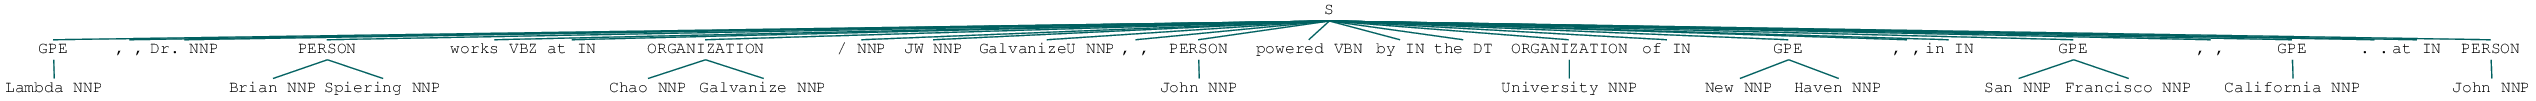

In [159]:
# : Write code to tag all the 'O' tokens with more descriptive labels. 

nltk.ne_chunk(tagged,
                    binary=False)

In [179]:
posTag = nltk.pos_tag(nltk.word_tokenize(text))
#stTag = nltk.ne_chunk(tagged,binary=False)

zippy = zip(tag_tuples, posTag)

#posTag

In [180]:
# for x, y in zippy:
#     #tag_tuples[i] = list(tag_tuples[i])
#     if x[1] == 'O':
#         tag_tuples[i][1] = posTag[i][1]
# #         print(tag_tuples[i])
        
# # tag_tuples



other = [pos if st[1]=='O' else st for st, pos in zippy]
other

[('Lambda', 'NNP'),
 (',', ','),
 ('Dr.', 'NNP'),
 ('Brian', 'PERSON'),
 ('Spiering', 'PERSON'),
 ('works', 'VBZ'),
 ('at', 'IN'),
 ('Chao', 'LOCATION'),
 ('Galvanize', 'LOCATION'),
 ('/', 'NNP'),
 ('JW', 'NNP'),
 ('GalvanizeU', 'NNP'),
 (',', ','),
 ('John', 'PERSON'),
 ('powered', 'VBN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('University', 'ORGANIZATION'),
 ('of', 'ORGANIZATION'),
 ('New', 'ORGANIZATION'),
 ('Haven', 'ORGANIZATION'),
 (',', ','),
 ('in', 'IN'),
 ('San', 'LOCATION'),
 ('Francisco', 'LOCATION'),
 (',', ','),
 ('California', 'LOCATION'),
 ('.', '.'),
 ('at', 'IN'),
 ('John', 'PERSON')]

<details><summary>
Click here for a hint.
</summary>
Conditionally combine both sets of tags
</details>

------
Compare NER tags for ntlk default vs. Stanford. 
----

Use "History of The United States" by Harles A. Beard and Mary R. Beard as the corpus.

Load the file, then perform NER twice:

1. First with ntlk default
2. Second with Standford

Compare performance on:

1. Correctness
2. Runtime

Is there a pattern to the misses?

Which tagger would you use? Why? When?

Hints: 
- Start with a small sample to test your code

In [185]:
with open('../../corpora/history_usa.txt') as f:
    text = f.read()
    
tagged = nltk.pos_tag(nltk.word_tokenize(text))
print(nltk.ne_chunk(tagged,
                    binary=False)[:10])

[('HISTORY', 'NN'), ('OF', 'IN'), Tree('ORGANIZATION', [('THE', 'NNP')]), Tree('ORGANIZATION', [('UNITED', 'NNP')]), ('STATES', 'NNPS'), ('BY', 'NNP'), ('CHARLES', 'NNP'), ('A', 'NNP'), ('.', '.'), Tree('ORGANIZATION', [('BEARD', 'NNP')])]


In [184]:
tag_tuples = st.tag(nltk.word_tokenize(text))
tag_tuples[:10]

[('HISTORY', 'O'),
 ('OF', 'O'),
 ('THE', 'O'),
 ('UNITED', 'O'),
 ('STATES', 'O'),
 ('BY', 'O'),
 ('CHARLES', 'O'),
 ('A', 'O'),
 ('.', 'O'),
 ('BEARD', 'O')]

In [187]:
%timeit nltk.ne_chunk(tagged, binary=False)[:10]

1 loop, best of 3: 1min 7s per loop


In [188]:
%timeit st.tag(nltk.word_tokenize(text))

1 loop, best of 3: 17 s per loop


----
Challenge Exercises
-----

Try NER with spaCy

In [67]:
# TODO: load and setup spacy

In [68]:
# Test
tokens = nlp("My name is Brian")

for token in tokens:
    print(token, token.tag_, token.ent_type_, sep="\t| ")

# Output:
"""
My	| PRP$	| 
name	| NN	| 
is	| VBZ	| 
Brian	| NNP	| PERSON
"""

NameError: name 'nlp' is not defined

In [ ]:
# TODO: Repeat NER for the same text used above

In [ ]:
# TODO: Benchmark spacy speed

<br>
<br>
----